In [148]:
# Import libraries
import import_ipynb
import fraudmodel
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

importing Jupyter notebook from fraudmodel.ipynb


In [63]:
# Import dataset
df = pd.read_csv('data/input.csv')
df2 = df[['transaction_risk_score','cc_amount','ledger_balance','cardholder_presence','card_presence',
          'partial_approval_capable','channel','processing_type','date','cc_acceptor_state','cc_acceptor_country','is_fraud']]
df2 = df2.sort_values(by='date')
df2 = df2.drop("date",axis=1)

Splitting data with ratio 0.5 as training set
-----RandomForest-----
Size of train set:  (17853, 10)
Size of test set:  (17854, 10)



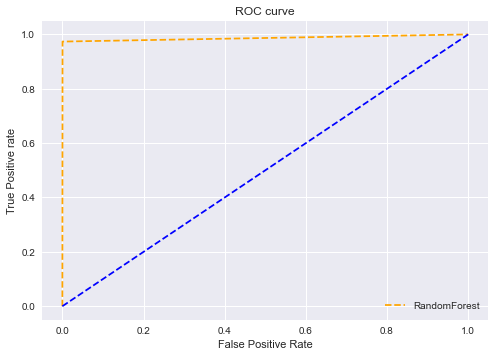

Precision:  0.991
Recall:  0.974
Accuracy:  0.998
F1_score:  0.982
AUC: 0.987
Confusion-matrix: 
[[17012     7]
 [   22   813]]


Splitting data with ratio 0.6 as training set
-----RandomForest-----
Size of train set:  (21424, 10)
Size of test set:  (14283, 10)



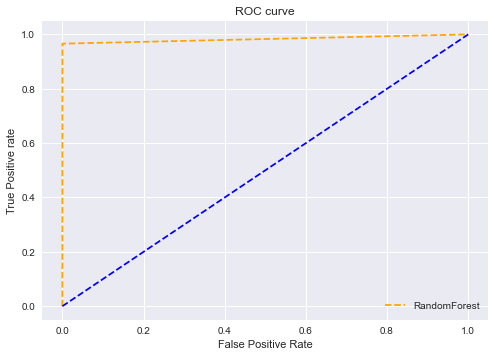

Precision:  0.997
Recall:  0.966
Accuracy:  0.998
F1_score:  0.981
AUC: 0.983
Confusion-matrix: 
[[13546     2]
 [   25   710]]


Splitting data with ratio 0.7 as training set
-----RandomForest-----
Size of train set:  (24994, 10)
Size of test set:  (10713, 10)



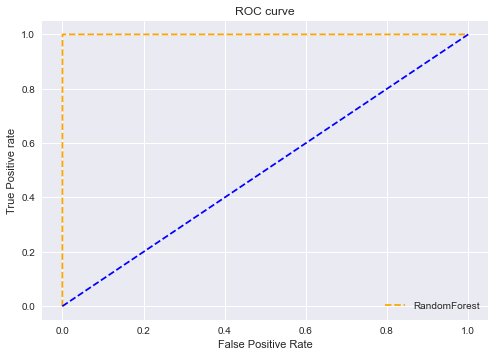

Precision:  0.995
Recall:  1.0
Accuracy:  1.0
F1_score:  0.997
AUC: 1.0
Confusion-matrix: 
[[10162     3]
 [    0   548]]


Splitting data with ratio 0.8 as training set
-----RandomForest-----
Size of train set:  (28565, 10)
Size of test set:  (7142, 10)



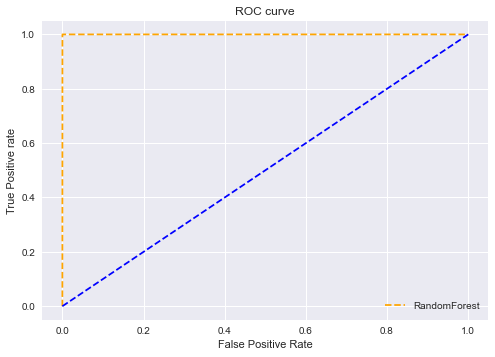

Precision:  0.998
Recall:  1.0
Accuracy:  1.0
F1_score:  0.999
AUC: 1.0
Confusion-matrix: 
[[6741    1]
 [   0  400]]


Splitting data with ratio 0.9 as training set
-----RandomForest-----
Size of train set:  (32136, 10)
Size of test set:  (3571, 10)



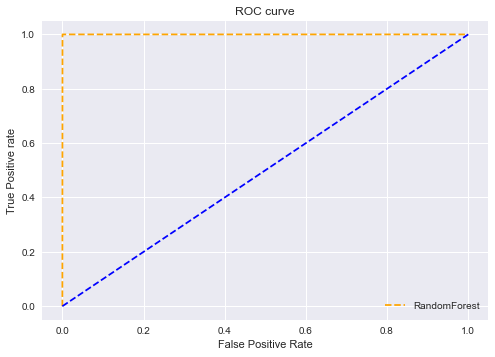

Precision:  0.996
Recall:  1.0
Accuracy:  1.0
F1_score:  0.998
AUC: 1.0
Confusion-matrix: 
[[3286    1]
 [   0  284]]




In [170]:
Generalsplit = []
for i in range(5):
    ratio = 0.5 + i * 0.1
    print("Splitting data with ratio " + str(ratio) + ' as training set')
    m = fraudmodel.GeneralSplit(df2,ratio,'RandomForest')
    Generalsplit.append(m)
    print()

Splitting data with ratio 0.5 as training set
-----LightGBM-----
Size of train set:  (17853, 10)
Size of test set:  (17854, 10)



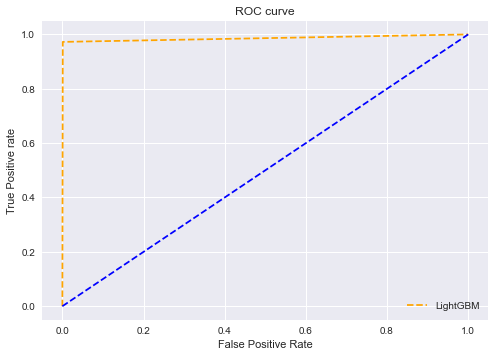

Precision:  0.979
Recall:  0.972
Accuracy:  0.998
F1_score:  0.976
AUC: 0.986
Confusion-matrix: 
[[17002    17]
 [   23   812]]


Splitting data with ratio 0.6 as training set
-----LightGBM-----
Size of train set:  (21424, 10)
Size of test set:  (14283, 10)



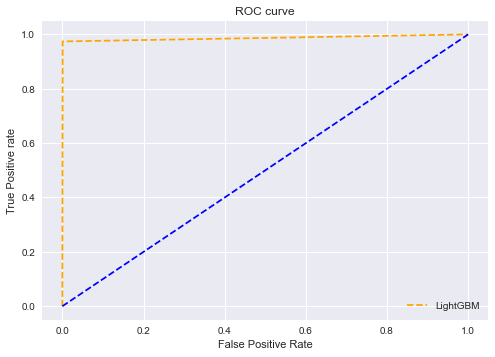

Precision:  0.988
Recall:  0.974
Accuracy:  0.998
F1_score:  0.981
AUC: 0.987
Confusion-matrix: 
[[13539     9]
 [   19   716]]


Splitting data with ratio 0.7 as training set
-----LightGBM-----
Size of train set:  (24994, 10)
Size of test set:  (10713, 10)



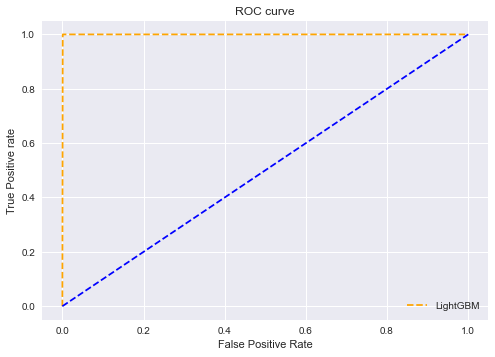

Precision:  0.984
Recall:  1.0
Accuracy:  0.999
F1_score:  0.992
AUC: 1.0
Confusion-matrix: 
[[10156     9]
 [    0   548]]


Splitting data with ratio 0.8 as training set
-----LightGBM-----
Size of train set:  (28565, 10)
Size of test set:  (7142, 10)



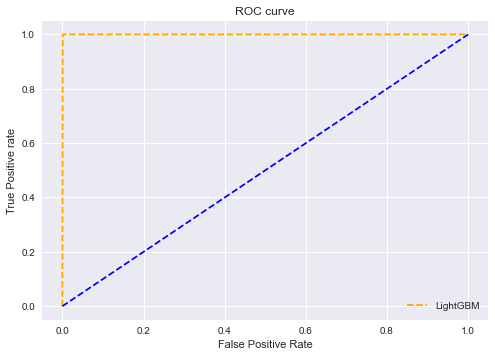

Precision:  0.985
Recall:  1.0
Accuracy:  0.999
F1_score:  0.993
AUC: 1.0
Confusion-matrix: 
[[6736    6]
 [   0  400]]


Splitting data with ratio 0.9 as training set
-----LightGBM-----
Size of train set:  (32136, 10)
Size of test set:  (3571, 10)



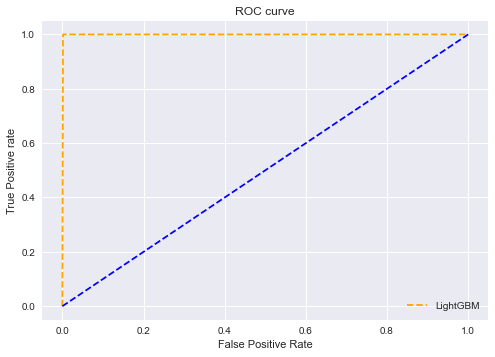

Precision:  0.983
Recall:  1.0
Accuracy:  0.999
F1_score:  0.991
AUC: 0.999
Confusion-matrix: 
[[3282    5]
 [   0  284]]




In [153]:
GeneralLGBM = []
for i in range(5):
    ratio = 0.5 + i * 0.1
    print("Splitting data with ratio " + str(ratio) + ' as training set')
    m = fraudmodel.GeneralSplit(df2,ratio,'LightGBM')
    GeneralLGBM.append(m)
    print()

In [67]:
X = df2.drop("is_fraud",axis=1)
y = df2[['is_fraud']].values.flatten()
scalar = StandardScaler()
X_scale = scalar.fit_transform(X)

-----RandomForest-----
Size of data set:  (35707, 10)
Size of each fold:  7141

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (14282, 10)
Precision on fold 2:  0.994
Recall on fold 2:  0.817
Accuracy on fold 2:  0.99
F1_score on fold 2:  0.897
AUC on fold 2:  0.908
Confusion-matrix: 
[[6750    2]
 [  71  317]]


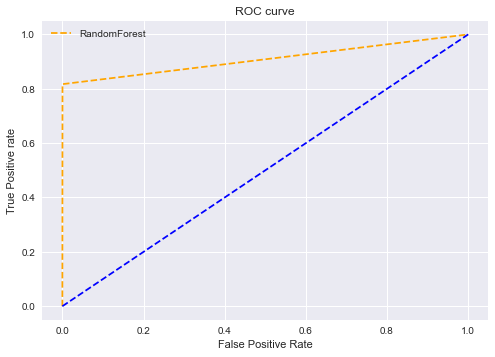


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (21423, 10)
Precision on fold 3:  0.995
Recall on fold 3:  0.814
Accuracy on fold 3:  0.993
F1_score on fold 3:  0.896
AUC on fold 3:  0.907
Confusion-matrix: 
[[6870    1]
 [  50  219]]


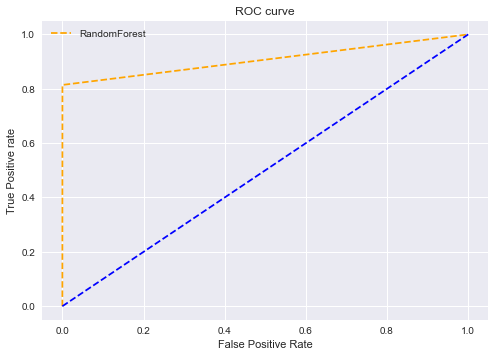


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (28564, 10)
Precision on fold 4:  0.997
Recall on fold 4:  0.94
Accuracy on fold 4:  0.997
F1_score on fold 4:  0.968
AUC on fold 4:  0.97
Confusion-matrix: 
[[6804    1]
 [  20  315]]


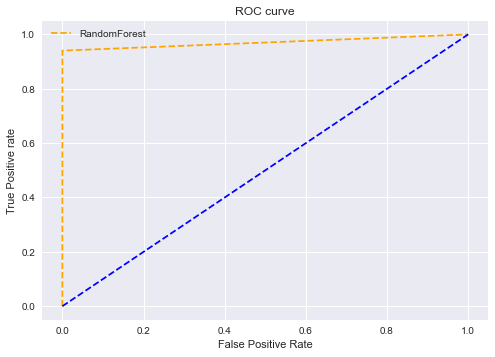


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (35705, 10)
Precision on fold 5:  0.998
Recall on fold 5:  1.0
Accuracy on fold 5:  1.0
F1_score on fold 5:  0.999
AUC on fold 5:  1.0
Confusion-matrix: 
[[6739    1]
 [   0  400]]


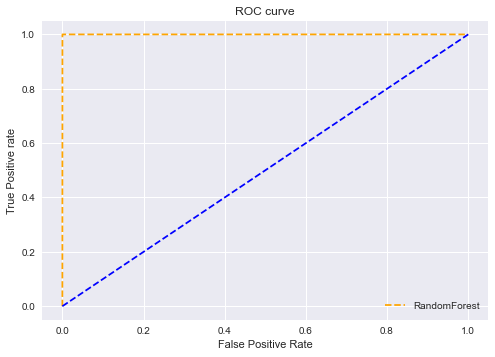

Precision mean: 0.996
Recall mean: 0.8927499999999999
Accuracy mean: 0.995
F1-Score mean: 0.9400000000000001
AUC mean: 0.94625


In [98]:
RF5 = model.TimeSeriesKFold(X, y, 5, 'RandomForest')

-----RandomForest-----
Size of data set:  (35707, 10)
Size of each fold:  3570

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (7140, 10)
Precision on fold 2:  0.971
Recall on fold 2:  0.85
Accuracy on fold 2:  0.99
F1_score on fold 2:  0.907
AUC on fold 2:  0.924
Confusion-matrix: 
[[3364    5]
 [  30  170]]


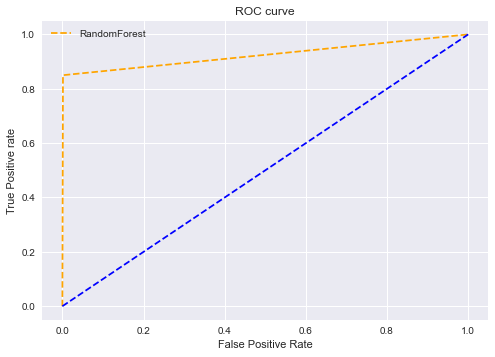


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (10710, 10)
Precision on fold 3:  1.0
Recall on fold 3:  0.835
Accuracy on fold 3:  0.989
F1_score on fold 3:  0.91
AUC on fold 3:  0.918
Confusion-matrix: 
[[3338    0]
 [  38  193]]


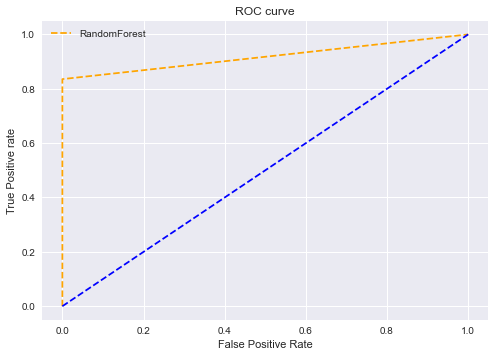


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (14280, 10)
Precision on fold 4:  0.984
Recall on fold 4:  0.79
Accuracy on fold 4:  0.99
F1_score on fold 4:  0.876
AUC on fold 4:  0.895
Confusion-matrix: 
[[3410    2]
 [  33  124]]


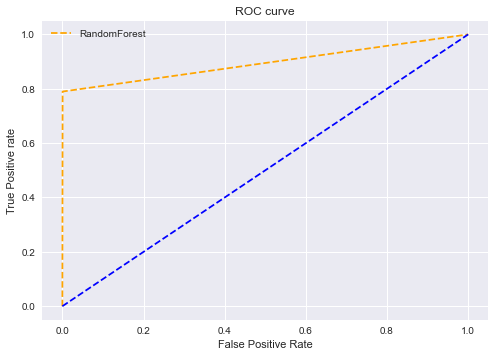


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (17850, 10)
Precision on fold 5:  0.992
Recall on fold 5:  0.746
Accuracy on fold 5:  0.988
F1_score on fold 5:  0.851
AUC on fold 5:  0.873
Confusion-matrix: 
[[3399    1]
 [  43  126]]


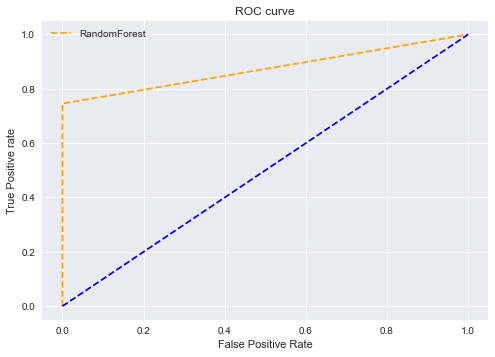


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (21420, 10)
Precision on fold 6:  0.96
Recall on fold 6:  0.95
Accuracy on fold 6:  0.997
F1_score on fold 6:  0.955
AUC on fold 6:  0.974
Confusion-matrix: 
[[3465    4]
 [   5   95]]


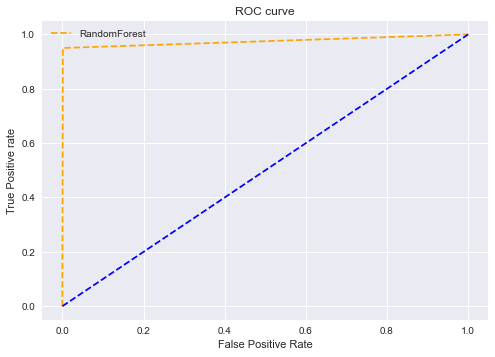


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (24990, 10)
Precision on fold 7:  0.994
Recall on fold 7:  0.893
Accuracy on fold 7:  0.994
F1_score on fold 7:  0.941
AUC on fold 7:  0.946
Confusion-matrix: 
[[3381    1]
 [  20  167]]


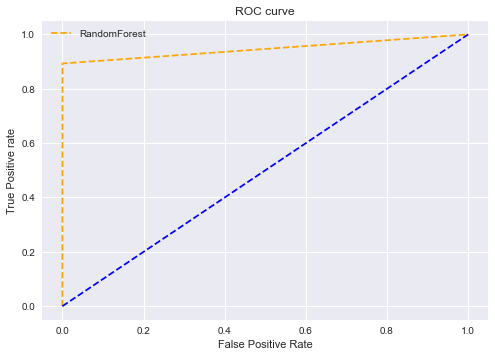


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (28560, 10)
Precision on fold 8:  1.0
Recall on fold 8:  1.0
Accuracy on fold 8:  1.0
F1_score on fold 8:  1.0
AUC on fold 8:  1.0
Confusion-matrix: 
[[3421    0]
 [   0  148]]


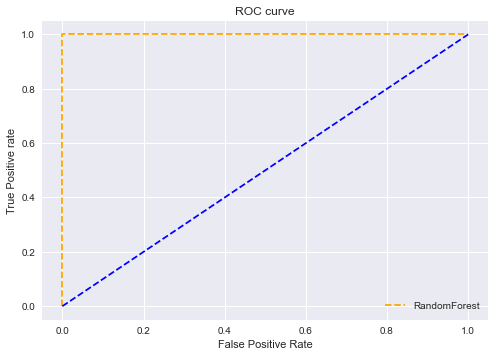


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (32130, 10)
Precision on fold 9:  1.0
Recall on fold 9:  1.0
Accuracy on fold 9:  1.0
F1_score on fold 9:  1.0
AUC on fold 9:  1.0
Confusion-matrix: 
[[3453    0]
 [   0  116]]


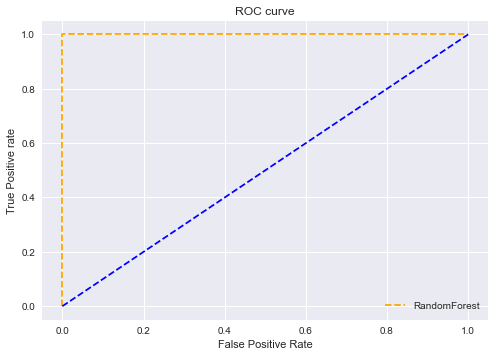


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (35700, 10)
Precision on fold 10:  0.996
Recall on fold 10:  1.0
Accuracy on fold 10:  1.0
F1_score on fold 10:  0.998
AUC on fold 10:  1.0
Confusion-matrix: 
[[3284    1]
 [   0  284]]


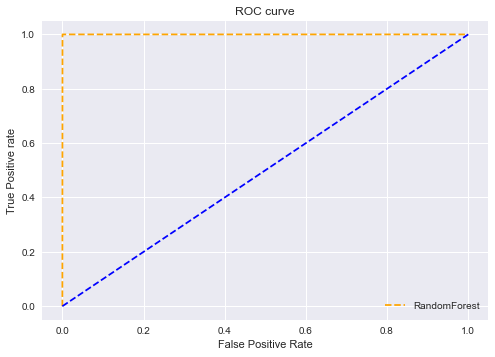

Precision mean: 0.9885555555555556
Recall mean: 0.896
Accuracy mean: 0.9942222222222222
F1-Score mean: 0.9375555555555555
AUC mean: 0.9477777777777779


In [71]:
RF10 = model.TimeSeriesKFold(X, y, 10, 'RandomForest')

-----RandomForest-----
Size of data set:  (35707, 10)
Size of each fold:  2380

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (4760, 10)
Precision on fold 2:  0.99
Recall on fold 2:  0.912
Accuracy on fold 2:  0.991
F1_score on fold 2:  0.949
AUC on fold 2:  0.956
Confusion-matrix: 
[[2161    2]
 [  19  197]]


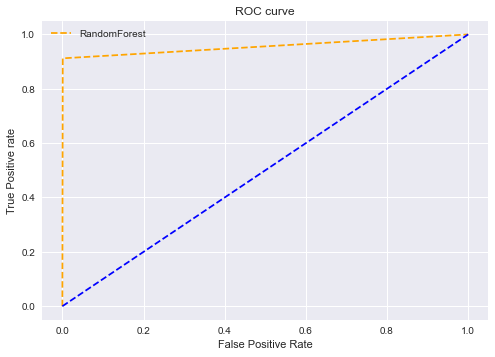


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (7140, 10)
Precision on fold 3:  0.974
Recall on fold 3:  0.841
Accuracy on fold 3:  0.99
F1_score on fold 3:  0.902
AUC on fold 3:  0.92
Confusion-matrix: 
[[2244    3]
 [  21  111]]


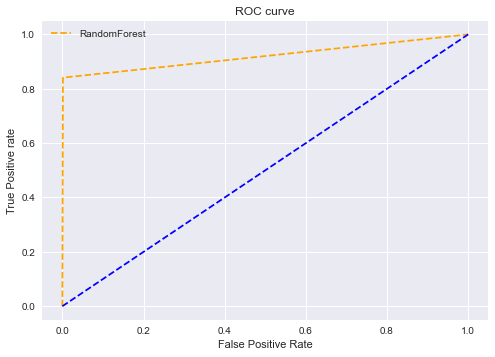


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (9520, 10)
Precision on fold 4:  1.0
Recall on fold 4:  0.834
Accuracy on fold 4:  0.989
F1_score on fold 4:  0.91
AUC on fold 4:  0.917
Confusion-matrix: 
[[2228    0]
 [  25  126]]


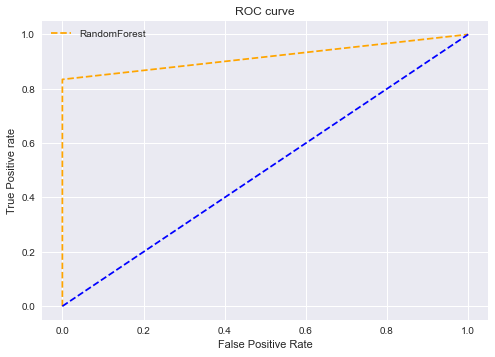


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (11900, 10)
Precision on fold 5:  0.986
Recall on fold 5:  0.861
Accuracy on fold 5:  0.989
F1_score on fold 5:  0.919
AUC on fold 5:  0.93
Confusion-matrix: 
[[2212    2]
 [  23  142]]


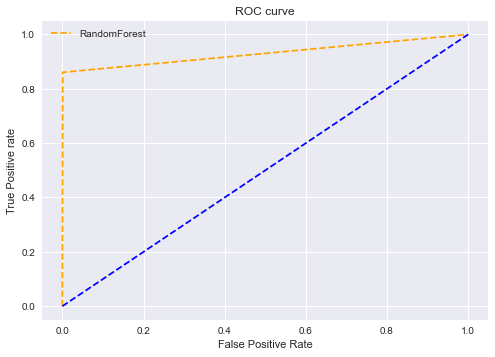


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (14280, 10)
Precision on fold 6:  0.981
Recall on fold 6:  0.722
Accuracy on fold 6:  0.991
F1_score on fold 6:  0.832
AUC on fold 6:  0.861
Confusion-matrix: 
[[2306    1]
 [  20   52]]


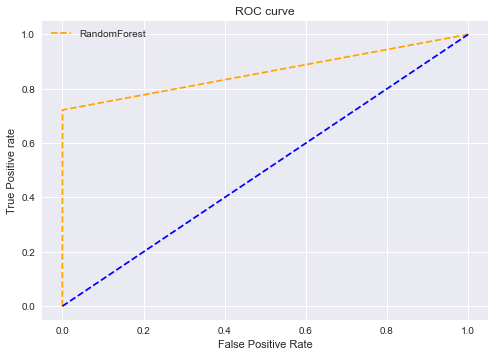


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (16660, 10)
Precision on fold 7:  0.985
Recall on fold 7:  0.793
Accuracy on fold 7:  0.992
F1_score on fold 7:  0.878
AUC on fold 7:  0.896
Confusion-matrix: 
[[2296    1]
 [  17   65]]


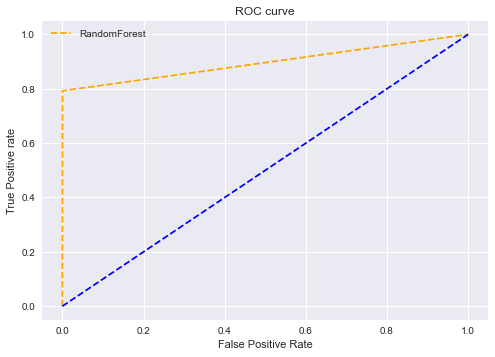


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (19040, 10)
Precision on fold 8:  1.0
Recall on fold 8:  0.748
Accuracy on fold 8:  0.989
F1_score on fold 8:  0.856
AUC on fold 8:  0.874
Confusion-matrix: 
[[2272    0]
 [  27   80]]


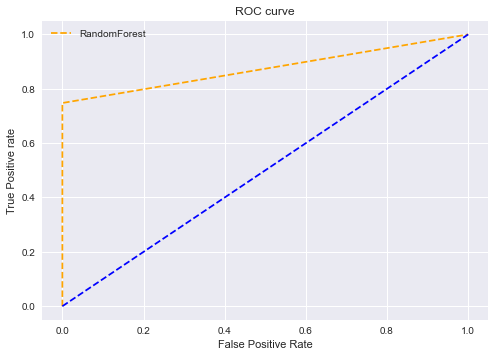


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (21420, 10)
Precision on fold 9:  0.962
Recall on fold 9:  0.95
Accuracy on fold 9:  0.997
F1_score on fold 9:  0.956
AUC on fold 9:  0.974
Confusion-matrix: 
[[2296    3]
 [   4   76]]


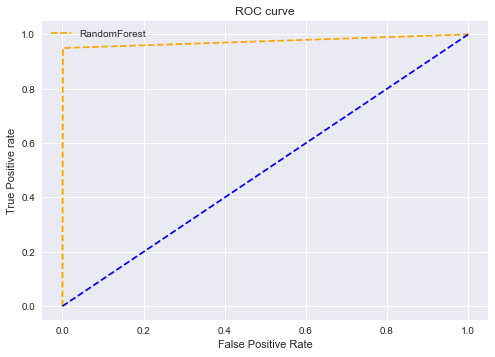


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (23800, 10)
Precision on fold 10:  0.976
Recall on fold 10:  0.82
Accuracy on fold 10:  0.996
F1_score on fold 10:  0.891
AUC on fold 10:  0.91
Confusion-matrix: 
[[2328    1]
 [   9   41]]


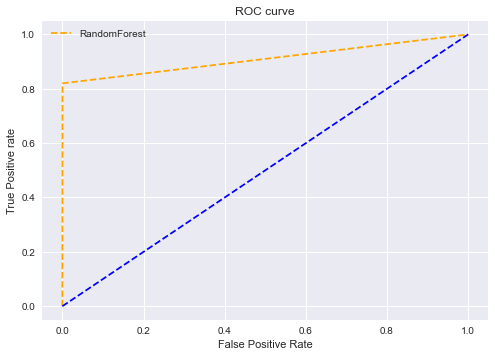


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (26180, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.92
Accuracy on fold 11:  0.994
F1_score on fold 11:  0.958
AUC on fold 11:  0.96
Confusion-matrix: 
[[2191    0]
 [  15  173]]


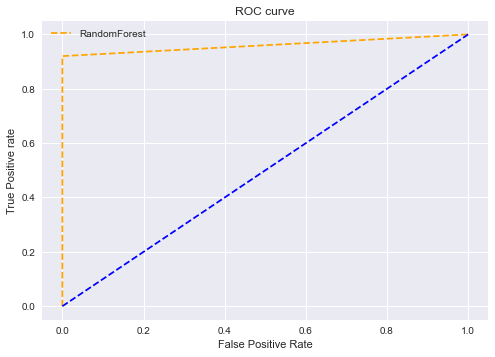


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (28560, 10)
Precision on fold 12:  1.0
Recall on fold 12:  1.0
Accuracy on fold 12:  1.0
F1_score on fold 12:  1.0
AUC on fold 12:  1.0
Confusion-matrix: 
[[2282    0]
 [   0   97]]


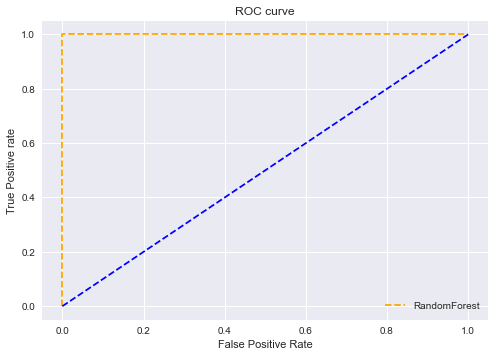


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (30940, 10)
Precision on fold 13:  1.0
Recall on fold 13:  1.0
Accuracy on fold 13:  1.0
F1_score on fold 13:  1.0
AUC on fold 13:  1.0
Confusion-matrix: 
[[2314    0]
 [   0   65]]


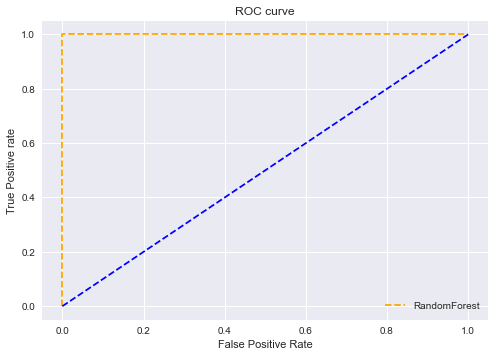


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (33320, 10)
Precision on fold 14:  1.0
Recall on fold 14:  1.0
Accuracy on fold 14:  1.0
F1_score on fold 14:  1.0
AUC on fold 14:  1.0
Confusion-matrix: 
[[2166    0]
 [   0  213]]


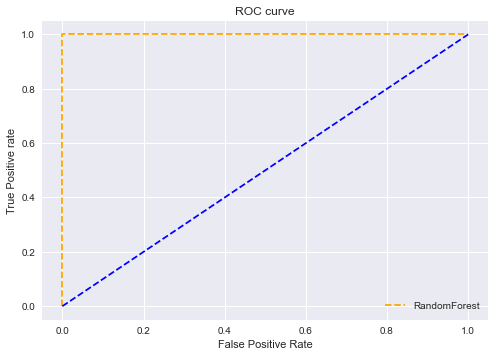


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (35700, 10)
Precision on fold 15:  0.992
Recall on fold 15:  1.0
Accuracy on fold 15:  1.0
F1_score on fold 15:  0.996
AUC on fold 15:  1.0
Confusion-matrix: 
[[2256    1]
 [   0  122]]


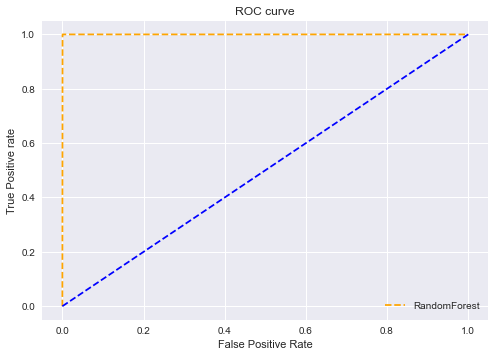

Precision mean: 0.989
Recall mean: 0.8857857142857143
Accuracy mean: 0.9941428571428571
F1-Score mean: 0.9319285714285714
AUC mean: 0.9427142857142857


In [100]:
RF15 = model.TimeSeriesKFold(X, y, 15, 'RandomForest')

-----RandomForest-----
Size of data set:  (35707, 10)
Size of each fold:  1785

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (3570, 10)
Precision on fold 2:  0.988
Recall on fold 2:  0.918
Accuracy on fold 2:  0.99
F1_score on fold 2:  0.952
AUC on fold 2:  0.959
Confusion-matrix: 
[[1598    2]
 [  15  169]]


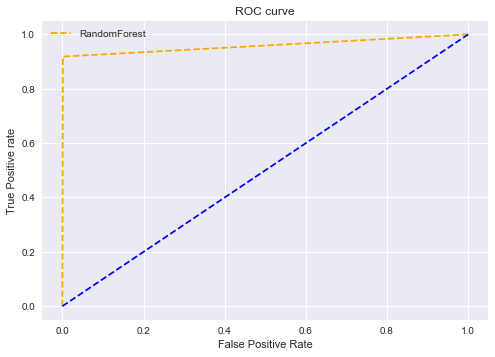


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (5355, 10)
Precision on fold 3:  0.977
Recall on fold 3:  0.894
Accuracy on fold 3:  0.993
F1_score on fold 3:  0.933
AUC on fold 3:  0.946
Confusion-matrix: 
[[1688    2]
 [  10   84]]


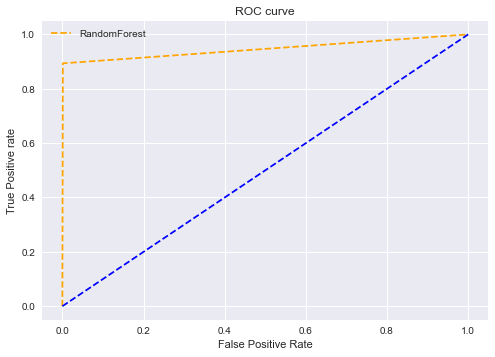


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (7140, 10)
Precision on fold 4:  0.967
Recall on fold 4:  0.83
Accuracy on fold 4:  0.988
F1_score on fold 4:  0.893
AUC on fold 4:  0.914
Confusion-matrix: 
[[1675    3]
 [  18   88]]


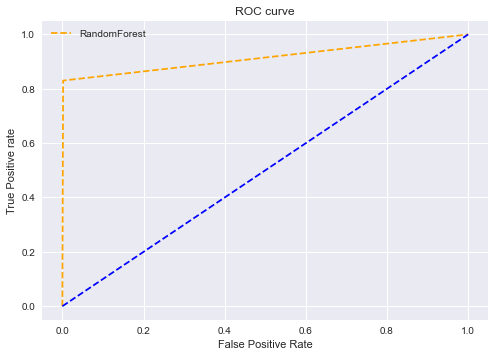


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (8925, 10)
Precision on fold 5:  1.0
Recall on fold 5:  0.837
Accuracy on fold 5:  0.988
F1_score on fold 5:  0.911
AUC on fold 5:  0.919
Confusion-matrix: 
[[1649    0]
 [  22  113]]


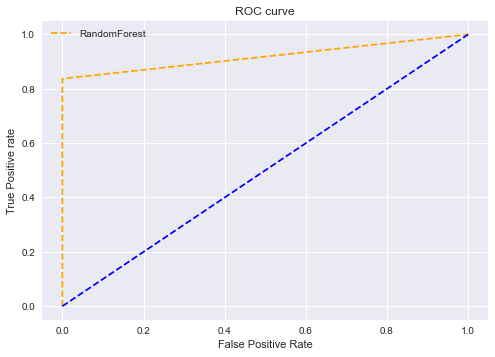


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (10710, 10)
Precision on fold 6:  1.0
Recall on fold 6:  0.844
Accuracy on fold 6:  0.992
F1_score on fold 6:  0.915
AUC on fold 6:  0.922
Confusion-matrix: 
[[1688    0]
 [  15   81]]


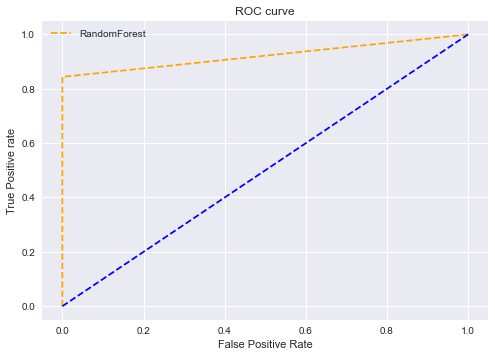


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (12495, 10)
Precision on fold 7:  0.989
Recall on fold 7:  0.826
Accuracy on fold 7:  0.989
F1_score on fold 7:  0.9
AUC on fold 7:  0.913
Confusion-matrix: 
[[1674    1]
 [  19   90]]


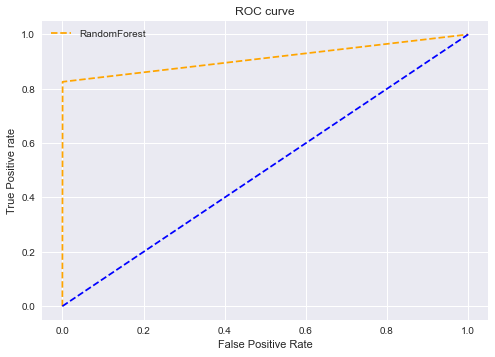


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (14280, 10)
Precision on fold 8:  0.973
Recall on fold 8:  0.75
Accuracy on fold 8:  0.993
F1_score on fold 8:  0.847
AUC on fold 8:  0.875
Confusion-matrix: 
[[1735    1]
 [  12   36]]


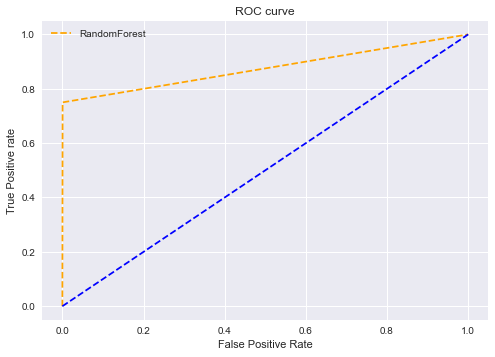


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (16065, 10)
Precision on fold 9:  0.982
Recall on fold 9:  0.775
Accuracy on fold 9:  0.99
F1_score on fold 9:  0.866
AUC on fold 9:  0.887
Confusion-matrix: 
[[1712    1]
 [  16   55]]


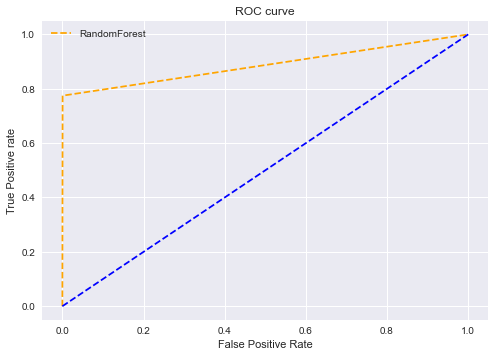


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (17850, 10)
Precision on fold 10:  1.0
Recall on fold 10:  0.735
Accuracy on fold 10:  0.985
F1_score on fold 10:  0.847
AUC on fold 10:  0.867
Confusion-matrix: 
[[1686    0]
 [  26   72]]


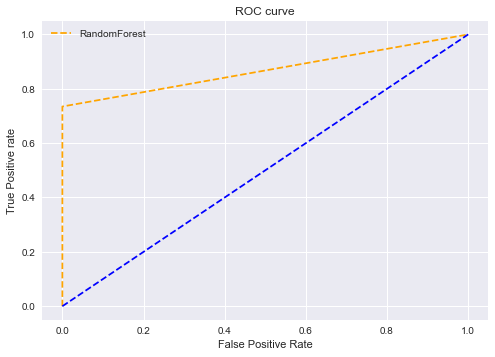


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (19635, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.933
Accuracy on fold 11:  0.999
F1_score on fold 11:  0.966
AUC on fold 11:  0.967
Confusion-matrix: 
[[1754    0]
 [   2   28]]


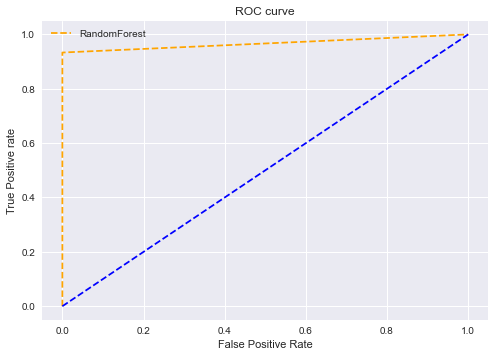


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (21420, 10)
Precision on fold 12:  0.957
Recall on fold 12:  0.957
Accuracy on fold 12:  0.997
F1_score on fold 12:  0.957
AUC on fold 12:  0.978
Confusion-matrix: 
[[1711    3]
 [   3   67]]


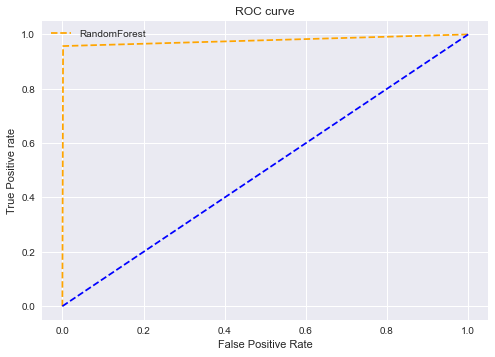


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (23205, 10)
Precision on fold 13:  0.962
Recall on fold 13:  0.926
Accuracy on fold 13:  0.998
F1_score on fold 13:  0.943
AUC on fold 13:  0.963
Confusion-matrix: 
[[1756    1]
 [   2   25]]


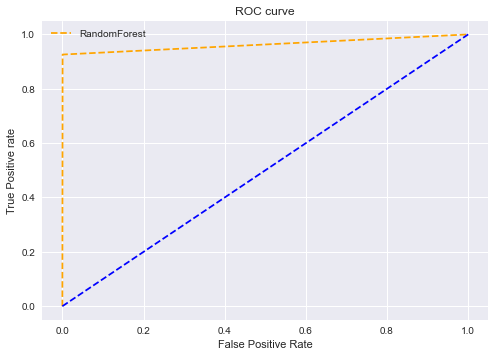


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (24990, 10)
Precision on fold 14:  1.0
Recall on fold 14:  0.856
Accuracy on fold 14:  0.987
F1_score on fold 14:  0.923
AUC on fold 14:  0.928
Confusion-matrix: 
[[1624    0]
 [  23  137]]


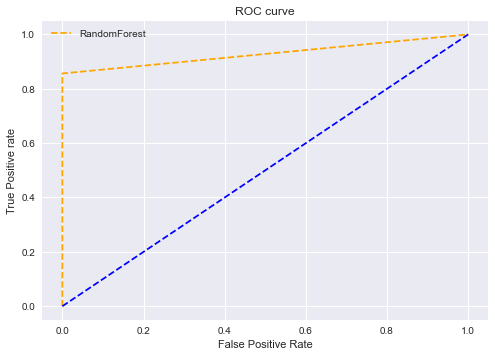


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (26775, 10)
Precision on fold 15:  1.0
Recall on fold 15:  1.0
Accuracy on fold 15:  1.0
F1_score on fold 15:  1.0
AUC on fold 15:  1.0
Confusion-matrix: 
[[1714    0]
 [   0   70]]


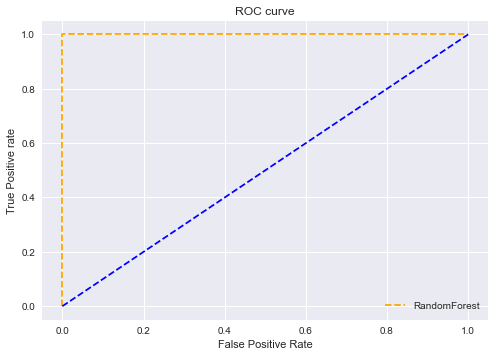


Splitting the first 16 chunks with ratio 15:1
Size of train + test:  (28560, 10)
Precision on fold 16:  1.0
Recall on fold 16:  1.0
Accuracy on fold 16:  1.0
F1_score on fold 16:  1.0
AUC on fold 16:  1.0
Confusion-matrix: 
[[1706    0]
 [   0   78]]


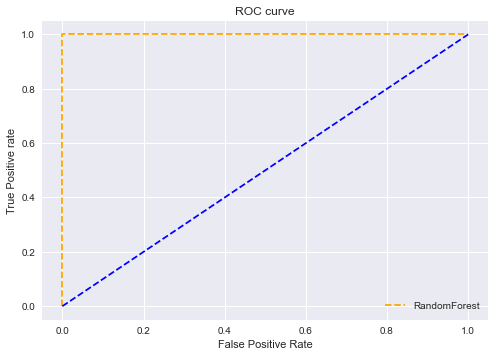


Splitting the first 17 chunks with ratio 16:1
Size of train + test:  (30345, 10)
Precision on fold 17:  1.0
Recall on fold 17:  1.0
Accuracy on fold 17:  1.0
F1_score on fold 17:  1.0
AUC on fold 17:  1.0
Confusion-matrix: 
[[1736    0]
 [   0   48]]


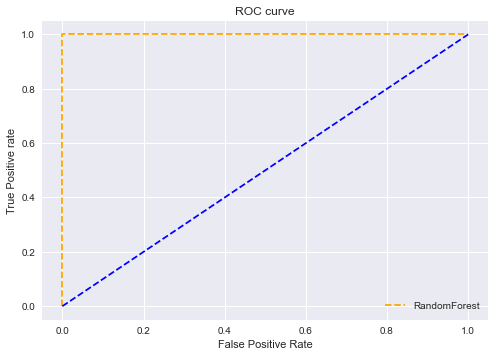


Splitting the first 18 chunks with ratio 17:1
Size of train + test:  (32130, 10)
Precision on fold 18:  1.0
Recall on fold 18:  1.0
Accuracy on fold 18:  1.0
F1_score on fold 18:  1.0
AUC on fold 18:  1.0
Confusion-matrix: 
[[1716    0]
 [   0   68]]


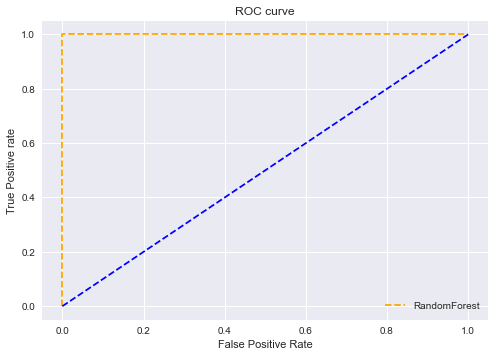


Splitting the first 19 chunks with ratio 18:1
Size of train + test:  (33915, 10)
Precision on fold 19:  0.995
Recall on fold 19:  1.0
Accuracy on fold 19:  0.999
F1_score on fold 19:  0.998
AUC on fold 19:  1.0
Confusion-matrix: 
[[1583    1]
 [   0  200]]


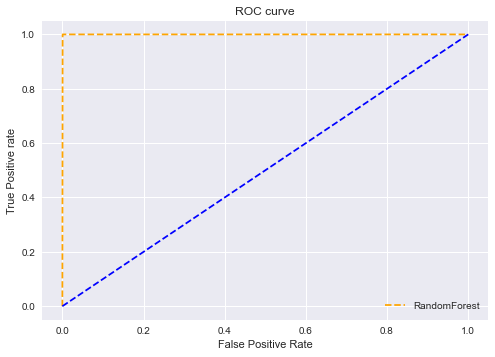


Splitting the first 20 chunks with ratio 19:1
Size of train + test:  (35700, 10)
Precision on fold 20:  1.0
Recall on fold 20:  1.0
Accuracy on fold 20:  1.0
F1_score on fold 20:  1.0
AUC on fold 20:  1.0
Confusion-matrix: 
[[1700    0]
 [   0   84]]


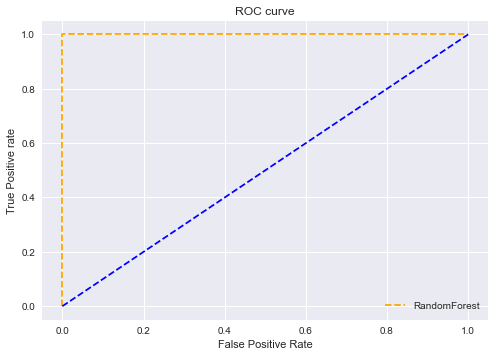

Precision mean: 0.9889473684210528
Recall mean: 0.899
Accuracy mean: 0.9941052631578946
F1-Score mean: 0.9395263157894739
AUC mean: 0.9493684210526316


In [72]:
RF20 = model.TimeSeriesKFold(X, y, 20, 'RandomForest')

-----LightGBM-----
Size of data set:  (35707, 10)
Size of each fold:  7141

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (14282, 10)
Precision on fold 2:  0.985
Recall on fold 2:  0.82
Accuracy on fold 2:  0.989
F1_score on fold 2:  0.895
AUC on fold 2:  0.909
Confusion-matrix: 
[[6747    5]
 [  70  318]]


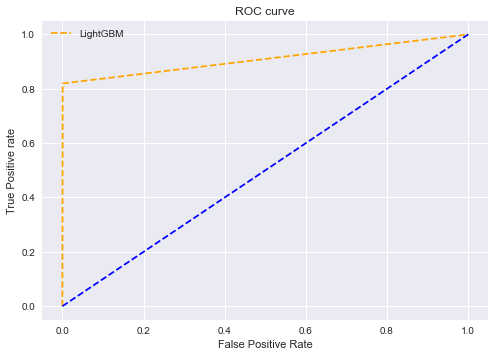


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (21423, 10)
Precision on fold 3:  0.968
Recall on fold 3:  0.799
Accuracy on fold 3:  0.991
F1_score on fold 3:  0.876
AUC on fold 3:  0.899
Confusion-matrix: 
[[6864    7]
 [  54  215]]


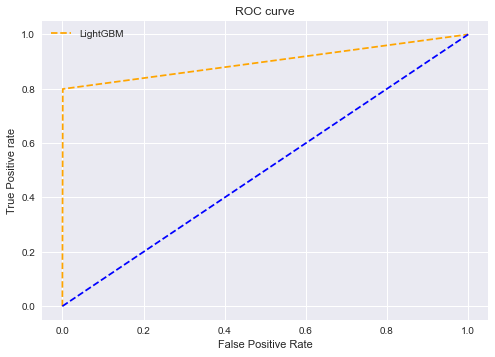


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (28564, 10)
Precision on fold 4:  0.99
Recall on fold 4:  0.925
Accuracy on fold 4:  0.996
F1_score on fold 4:  0.957
AUC on fold 4:  0.962
Confusion-matrix: 
[[6802    3]
 [  25  310]]


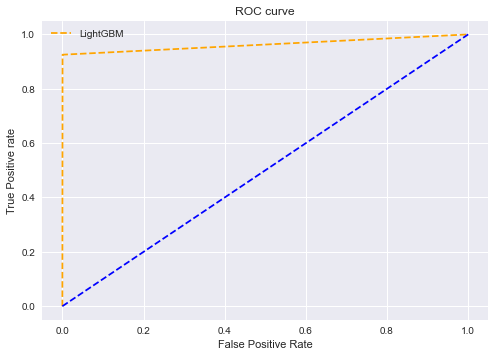


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (35705, 10)
Precision on fold 5:  0.985
Recall on fold 5:  1.0
Accuracy on fold 5:  0.999
F1_score on fold 5:  0.993
AUC on fold 5:  1.0
Confusion-matrix: 
[[6734    6]
 [   0  400]]


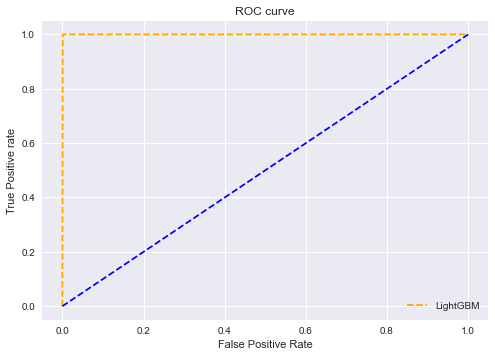

Precision mean: 0.9819999999999999
Recall mean: 0.886
Accuracy mean: 0.99375
F1-Score mean: 0.9302499999999999
AUC mean: 0.9425


In [99]:
LGBM5 = model.TimeSeriesKFold(X, y, 5, 'LightGBM')

-----LightGBM-----
Size of data set:  (35707, 10)
Size of each fold:  3570

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (7140, 10)
Precision on fold 2:  0.961
Recall on fold 2:  0.87
Accuracy on fold 2:  0.991
F1_score on fold 2:  0.913
AUC on fold 2:  0.934
Confusion-matrix: 
[[3362    7]
 [  26  174]]


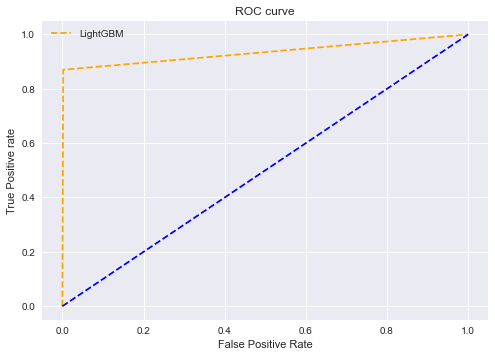


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (10710, 10)
Precision on fold 3:  0.985
Recall on fold 3:  0.84
Accuracy on fold 3:  0.989
F1_score on fold 3:  0.907
AUC on fold 3:  0.919
Confusion-matrix: 
[[3335    3]
 [  37  194]]


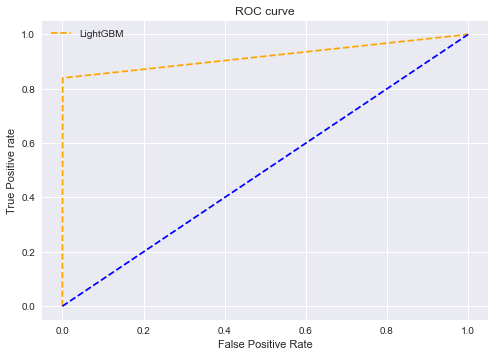


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (14280, 10)
Precision on fold 4:  0.984
Recall on fold 4:  0.803
Accuracy on fold 4:  0.991
F1_score on fold 4:  0.884
AUC on fold 4:  0.901
Confusion-matrix: 
[[3410    2]
 [  31  126]]


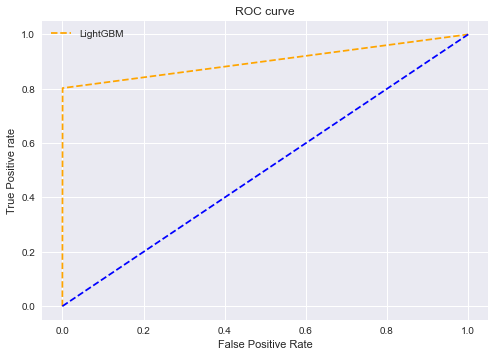


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (17850, 10)
Precision on fold 5:  0.969
Recall on fold 5:  0.74
Accuracy on fold 5:  0.987
F1_score on fold 5:  0.839
AUC on fold 5:  0.869
Confusion-matrix: 
[[3396    4]
 [  44  125]]


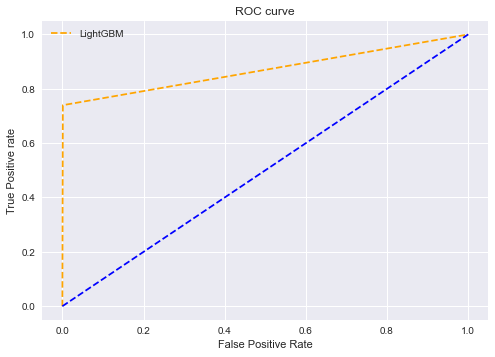


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (21420, 10)
Precision on fold 6:  0.907
Recall on fold 6:  0.49
Accuracy on fold 6:  0.984
F1_score on fold 6:  0.636
AUC on fold 6:  0.744
Confusion-matrix: 
[[3464    5]
 [  51   49]]


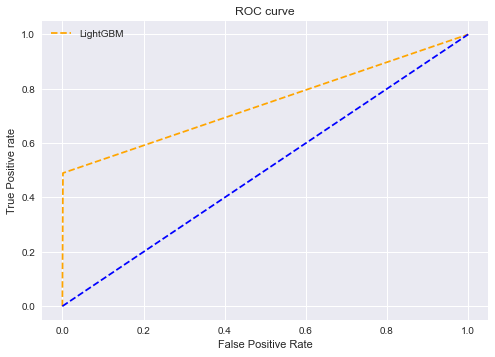


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (24990, 10)
Precision on fold 7:  0.994
Recall on fold 7:  0.866
Accuracy on fold 7:  0.993
F1_score on fold 7:  0.926
AUC on fold 7:  0.933
Confusion-matrix: 
[[3381    1]
 [  25  162]]


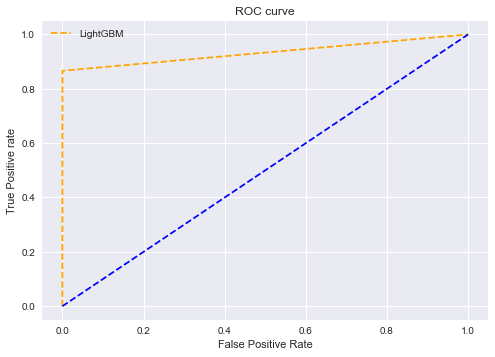


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (28560, 10)
Precision on fold 8:  0.993
Recall on fold 8:  1.0
Accuracy on fold 8:  1.0
F1_score on fold 8:  0.997
AUC on fold 8:  1.0
Confusion-matrix: 
[[3420    1]
 [   0  148]]


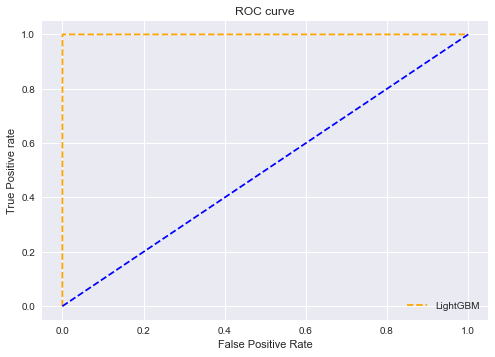


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (32130, 10)
Precision on fold 9:  0.991
Recall on fold 9:  1.0
Accuracy on fold 9:  1.0
F1_score on fold 9:  0.996
AUC on fold 9:  1.0
Confusion-matrix: 
[[3452    1]
 [   0  116]]


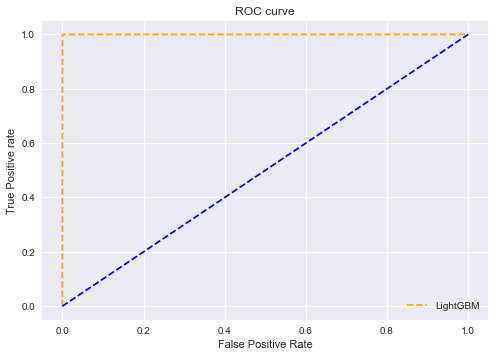


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (35700, 10)
Precision on fold 10:  0.99
Recall on fold 10:  1.0
Accuracy on fold 10:  0.999
F1_score on fold 10:  0.995
AUC on fold 10:  1.0
Confusion-matrix: 
[[3282    3]
 [   0  284]]


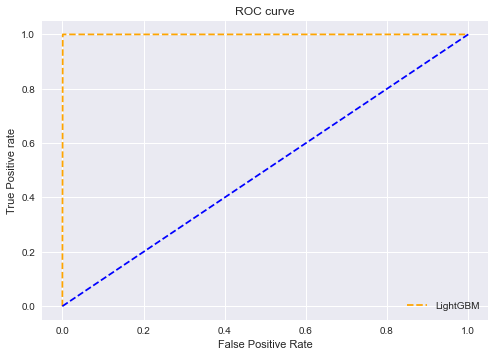

Precision mean: 0.9748888888888888
Recall mean: 0.8454444444444444
Accuracy mean: 0.9926666666666668
F1-Score mean: 0.8992222222222223
AUC mean: 0.9222222222222223


In [73]:
LGBM10 = model.TimeSeriesKFold(X, y, 10, 'LightGBM')

-----LightGBM-----
Size of data set:  (35707, 10)
Size of each fold:  2380

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (4760, 10)
Precision on fold 2:  0.995
Recall on fold 2:  0.894
Accuracy on fold 2:  0.99
F1_score on fold 2:  0.941
AUC on fold 2:  0.947
Confusion-matrix: 
[[2162    1]
 [  23  193]]


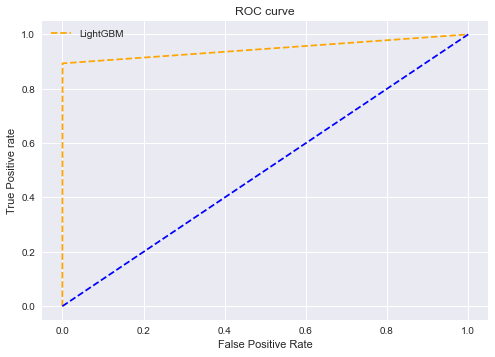


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (7140, 10)
Precision on fold 3:  0.973
Recall on fold 3:  0.833
Accuracy on fold 3:  0.989
F1_score on fold 3:  0.898
AUC on fold 3:  0.916
Confusion-matrix: 
[[2244    3]
 [  22  110]]


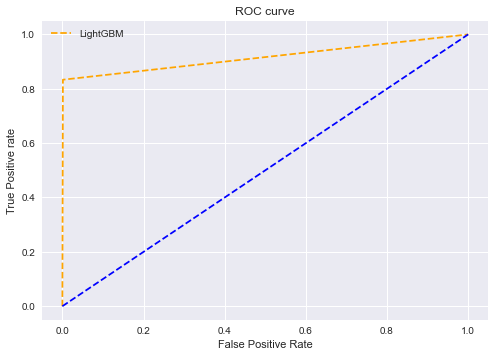


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (9520, 10)
Precision on fold 4:  0.977
Recall on fold 4:  0.834
Accuracy on fold 4:  0.988
F1_score on fold 4:  0.9
AUC on fold 4:  0.917
Confusion-matrix: 
[[2225    3]
 [  25  126]]


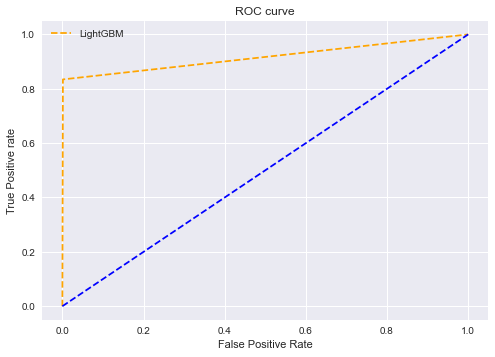


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (11900, 10)
Precision on fold 5:  0.993
Recall on fold 5:  0.861
Accuracy on fold 5:  0.99
F1_score on fold 5:  0.922
AUC on fold 5:  0.93
Confusion-matrix: 
[[2213    1]
 [  23  142]]


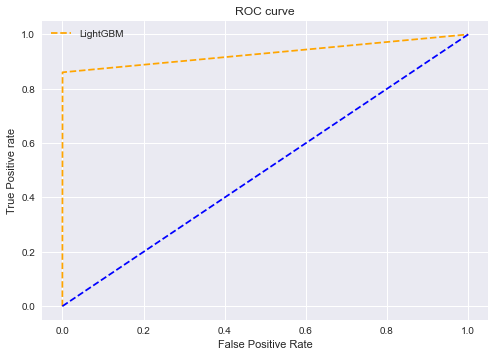


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (14280, 10)
Precision on fold 6:  0.966
Recall on fold 6:  0.778
Accuracy on fold 6:  0.992
F1_score on fold 6:  0.862
AUC on fold 6:  0.888
Confusion-matrix: 
[[2305    2]
 [  16   56]]


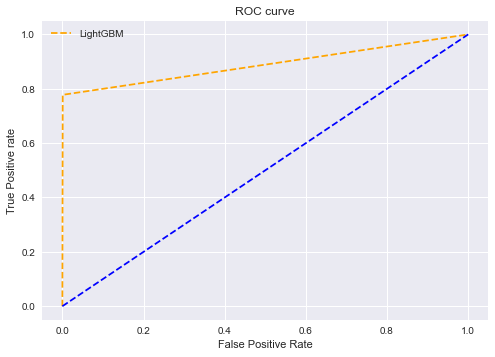


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (16660, 10)
Precision on fold 7:  0.956
Recall on fold 7:  0.793
Accuracy on fold 7:  0.992
F1_score on fold 7:  0.867
AUC on fold 7:  0.896
Confusion-matrix: 
[[2294    3]
 [  17   65]]


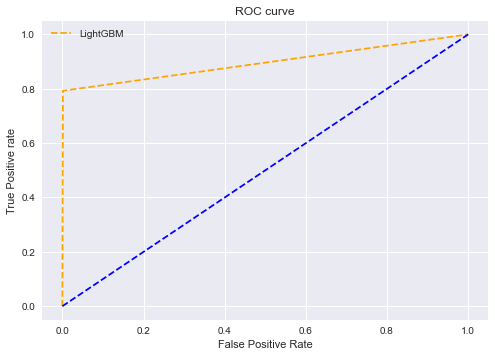


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (19040, 10)
Precision on fold 8:  1.0
Recall on fold 8:  0.776
Accuracy on fold 8:  0.99
F1_score on fold 8:  0.874
AUC on fold 8:  0.888
Confusion-matrix: 
[[2272    0]
 [  24   83]]


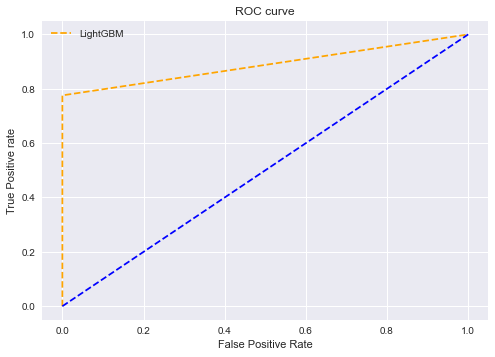


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (21420, 10)
Precision on fold 9:  0.915
Recall on fold 9:  0.675
Accuracy on fold 9:  0.987
F1_score on fold 9:  0.777
AUC on fold 9:  0.836
Confusion-matrix: 
[[2294    5]
 [  26   54]]


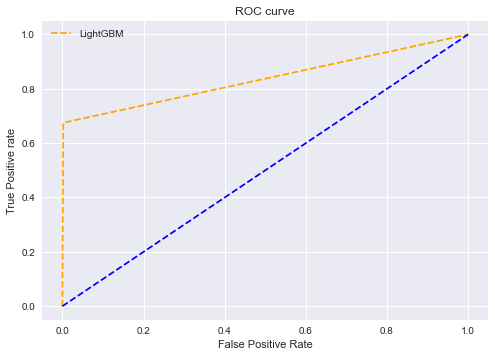


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (23800, 10)
Precision on fold 10:  0.976
Recall on fold 10:  0.82
Accuracy on fold 10:  0.996
F1_score on fold 10:  0.891
AUC on fold 10:  0.91
Confusion-matrix: 
[[2328    1]
 [   9   41]]


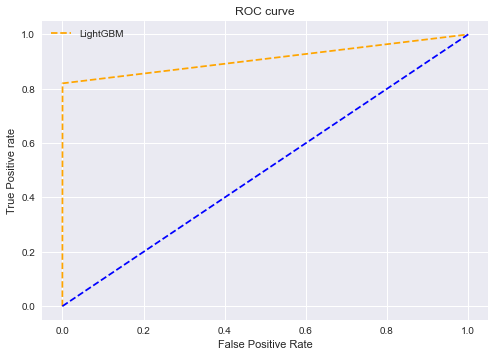


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (26180, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.899
Accuracy on fold 11:  0.992
F1_score on fold 11:  0.947
AUC on fold 11:  0.949
Confusion-matrix: 
[[2191    0]
 [  19  169]]


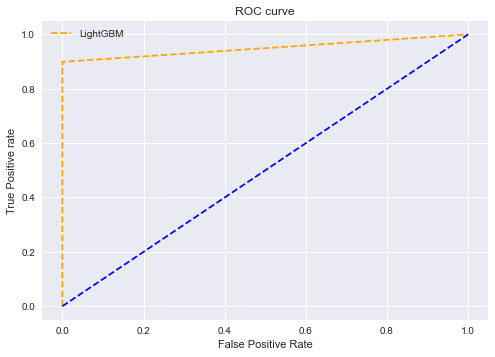


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (28560, 10)
Precision on fold 12:  0.99
Recall on fold 12:  1.0
Accuracy on fold 12:  1.0
F1_score on fold 12:  0.995
AUC on fold 12:  1.0
Confusion-matrix: 
[[2281    1]
 [   0   97]]


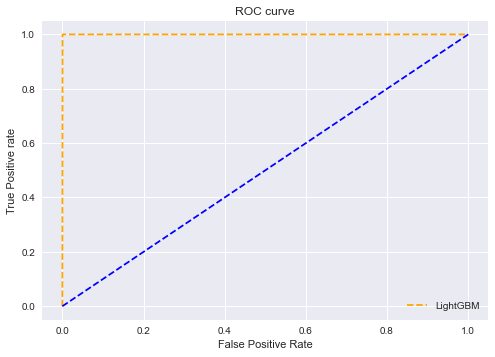


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (30940, 10)
Precision on fold 13:  0.985
Recall on fold 13:  1.0
Accuracy on fold 13:  1.0
F1_score on fold 13:  0.992
AUC on fold 13:  1.0
Confusion-matrix: 
[[2313    1]
 [   0   65]]


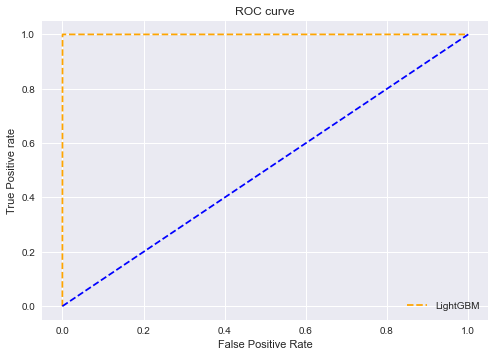


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (33320, 10)
Precision on fold 14:  0.995
Recall on fold 14:  1.0
Accuracy on fold 14:  1.0
F1_score on fold 14:  0.998
AUC on fold 14:  1.0
Confusion-matrix: 
[[2165    1]
 [   0  213]]


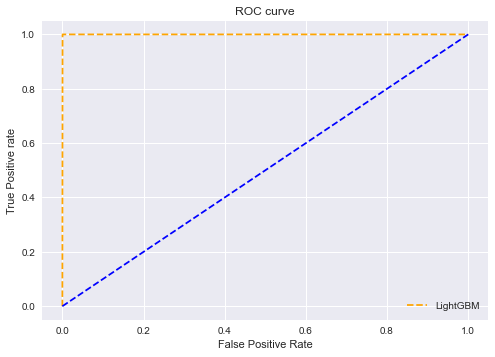


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (35700, 10)
Precision on fold 15:  0.968
Recall on fold 15:  1.0
Accuracy on fold 15:  0.998
F1_score on fold 15:  0.984
AUC on fold 15:  0.999
Confusion-matrix: 
[[2253    4]
 [   0  122]]


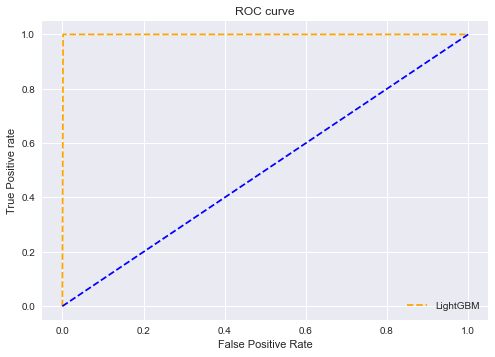

Precision mean: 0.9777857142857141
Recall mean: 0.8687857142857143
Accuracy mean: 0.993142857142857
F1-Score mean: 0.9177142857142856
AUC mean: 0.934


In [101]:
LGBM15 = model.TimeSeriesKFold(X, y, 15, 'LightGBM')

-----LightGBM-----
Size of data set:  (35707, 10)
Size of each fold:  1785

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (3570, 10)
Precision on fold 2:  0.989
Recall on fold 2:  0.935
Accuracy on fold 2:  0.992
F1_score on fold 2:  0.961
AUC on fold 2:  0.967
Confusion-matrix: 
[[1598    2]
 [  12  172]]


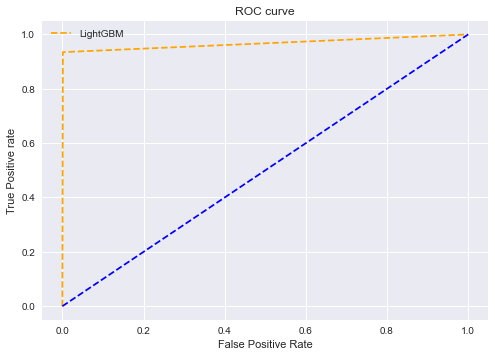


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (5355, 10)
Precision on fold 3:  0.977
Recall on fold 3:  0.915
Accuracy on fold 3:  0.994
F1_score on fold 3:  0.945
AUC on fold 3:  0.957
Confusion-matrix: 
[[1688    2]
 [   8   86]]


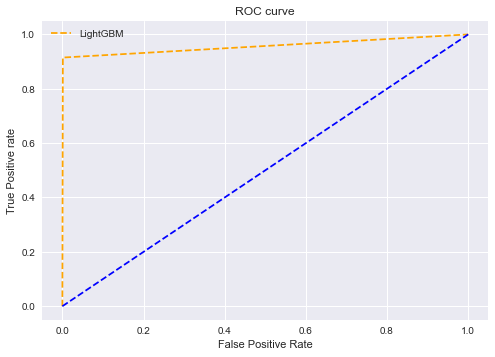


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (7140, 10)
Precision on fold 4:  0.967
Recall on fold 4:  0.83
Accuracy on fold 4:  0.988
F1_score on fold 4:  0.893
AUC on fold 4:  0.914
Confusion-matrix: 
[[1675    3]
 [  18   88]]


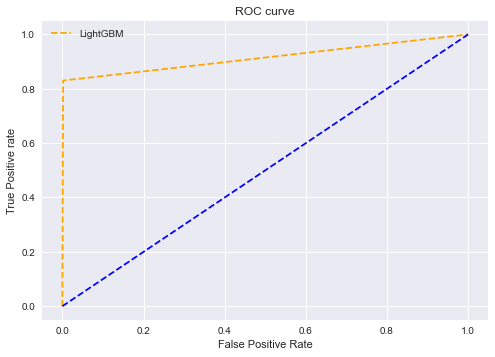


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (8925, 10)
Precision on fold 5:  0.983
Recall on fold 5:  0.844
Accuracy on fold 5:  0.987
F1_score on fold 5:  0.908
AUC on fold 5:  0.922
Confusion-matrix: 
[[1647    2]
 [  21  114]]


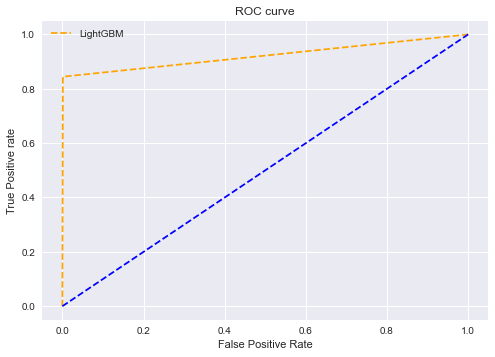


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (10710, 10)
Precision on fold 6:  1.0
Recall on fold 6:  0.833
Accuracy on fold 6:  0.991
F1_score on fold 6:  0.909
AUC on fold 6:  0.917
Confusion-matrix: 
[[1688    0]
 [  16   80]]


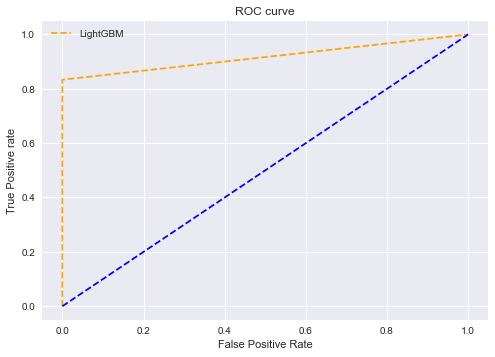


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (12495, 10)
Precision on fold 7:  0.989
Recall on fold 7:  0.844
Accuracy on fold 7:  0.99
F1_score on fold 7:  0.911
AUC on fold 7:  0.922
Confusion-matrix: 
[[1674    1]
 [  17   92]]


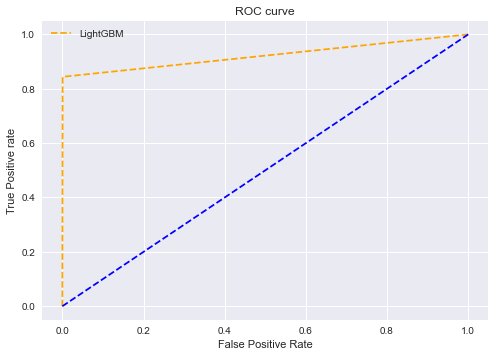


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (14280, 10)
Precision on fold 8:  0.973
Recall on fold 8:  0.75
Accuracy on fold 8:  0.993
F1_score on fold 8:  0.847
AUC on fold 8:  0.875
Confusion-matrix: 
[[1735    1]
 [  12   36]]


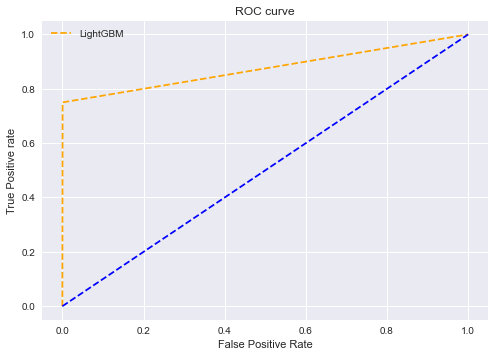


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (16065, 10)
Precision on fold 9:  0.948
Recall on fold 9:  0.775
Accuracy on fold 9:  0.989
F1_score on fold 9:  0.853
AUC on fold 9:  0.886
Confusion-matrix: 
[[1710    3]
 [  16   55]]


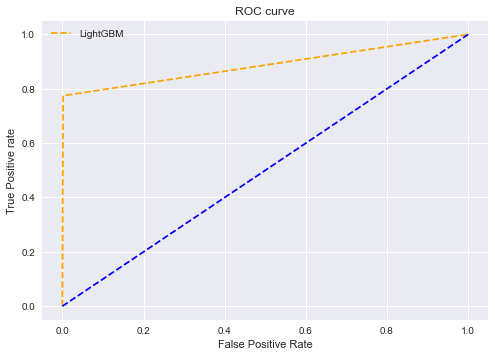


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (17850, 10)
Precision on fold 10:  1.0
Recall on fold 10:  0.745
Accuracy on fold 10:  0.986
F1_score on fold 10:  0.854
AUC on fold 10:  0.872
Confusion-matrix: 
[[1686    0]
 [  25   73]]


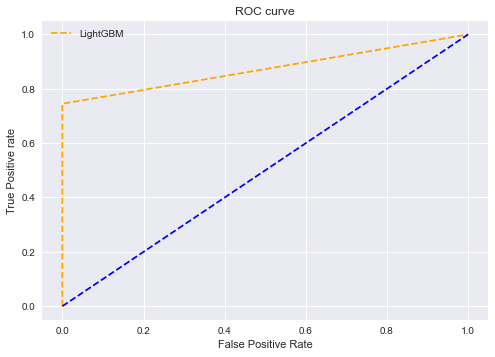


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (19635, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.9
Accuracy on fold 11:  0.998
F1_score on fold 11:  0.947
AUC on fold 11:  0.95
Confusion-matrix: 
[[1754    0]
 [   3   27]]


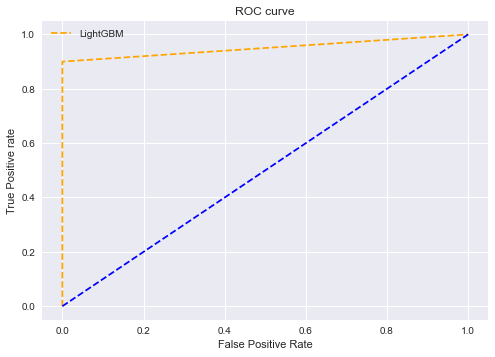


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (21420, 10)
Precision on fold 12:  0.942
Recall on fold 12:  0.929
Accuracy on fold 12:  0.995
F1_score on fold 12:  0.935
AUC on fold 12:  0.963
Confusion-matrix: 
[[1710    4]
 [   5   65]]


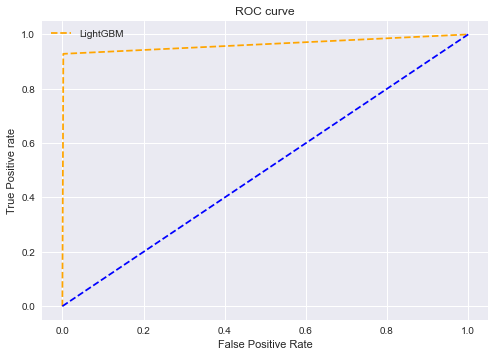


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (23205, 10)
Precision on fold 13:  0.962
Recall on fold 13:  0.926
Accuracy on fold 13:  0.998
F1_score on fold 13:  0.943
AUC on fold 13:  0.963
Confusion-matrix: 
[[1756    1]
 [   2   25]]


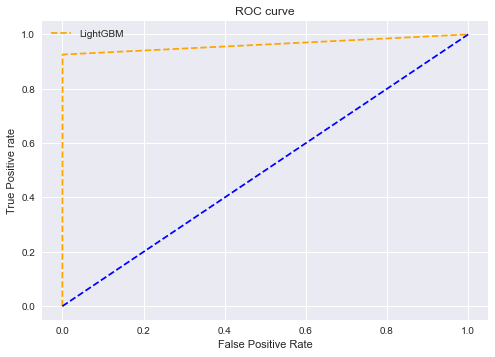


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (24990, 10)
Precision on fold 14:  1.0
Recall on fold 14:  0.881
Accuracy on fold 14:  0.989
F1_score on fold 14:  0.937
AUC on fold 14:  0.941
Confusion-matrix: 
[[1624    0]
 [  19  141]]


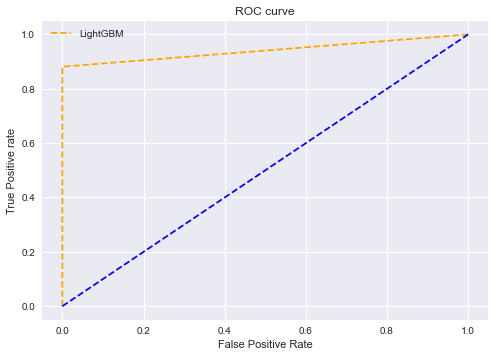


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (26775, 10)
Precision on fold 15:  1.0
Recall on fold 15:  1.0
Accuracy on fold 15:  1.0
F1_score on fold 15:  1.0
AUC on fold 15:  1.0
Confusion-matrix: 
[[1714    0]
 [   0   70]]


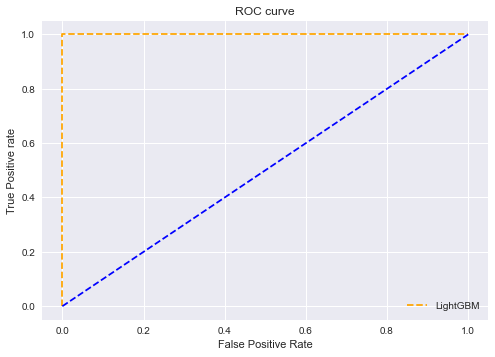


Splitting the first 16 chunks with ratio 15:1
Size of train + test:  (28560, 10)
Precision on fold 16:  0.987
Recall on fold 16:  1.0
Accuracy on fold 16:  0.999
F1_score on fold 16:  0.994
AUC on fold 16:  1.0
Confusion-matrix: 
[[1705    1]
 [   0   78]]


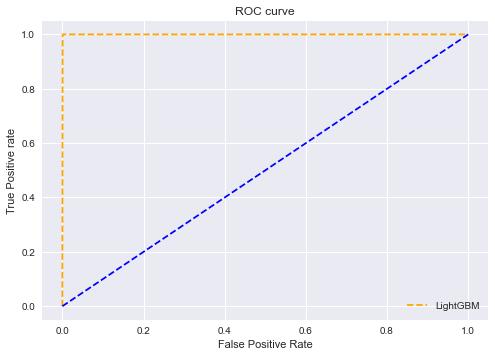


Splitting the first 17 chunks with ratio 16:1
Size of train + test:  (30345, 10)
Precision on fold 17:  0.98
Recall on fold 17:  1.0
Accuracy on fold 17:  0.999
F1_score on fold 17:  0.99
AUC on fold 17:  1.0
Confusion-matrix: 
[[1735    1]
 [   0   48]]


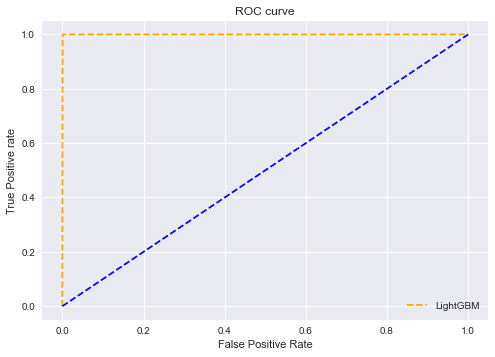


Splitting the first 18 chunks with ratio 17:1
Size of train + test:  (32130, 10)
Precision on fold 18:  1.0
Recall on fold 18:  1.0
Accuracy on fold 18:  1.0
F1_score on fold 18:  1.0
AUC on fold 18:  1.0
Confusion-matrix: 
[[1716    0]
 [   0   68]]


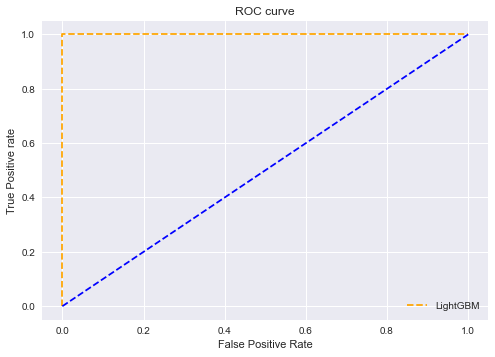


Splitting the first 19 chunks with ratio 18:1
Size of train + test:  (33915, 10)
Precision on fold 19:  0.99
Recall on fold 19:  1.0
Accuracy on fold 19:  0.999
F1_score on fold 19:  0.995
AUC on fold 19:  0.999
Confusion-matrix: 
[[1582    2]
 [   0  200]]


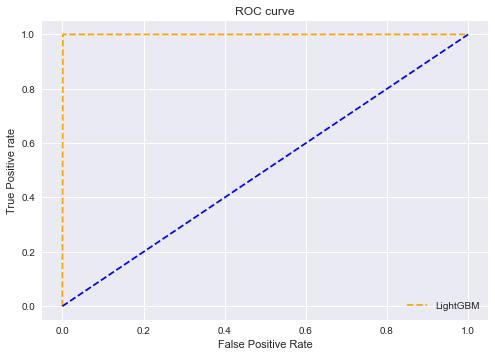


Splitting the first 20 chunks with ratio 19:1
Size of train + test:  (35700, 10)
Precision on fold 20:  0.977
Recall on fold 20:  1.0
Accuracy on fold 20:  0.999
F1_score on fold 20:  0.988
AUC on fold 20:  0.999
Confusion-matrix: 
[[1698    2]
 [   0   84]]


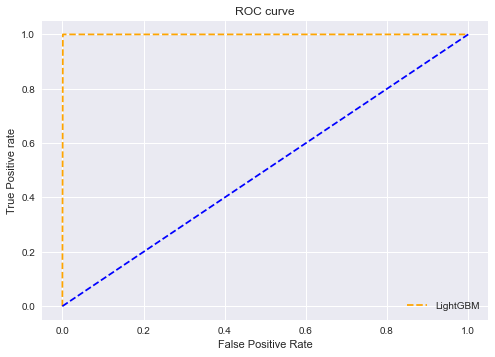

Precision mean: 0.9823157894736841
Recall mean: 0.9003684210526316
Accuracy mean: 0.9939999999999998
F1-Score mean: 0.9373684210526317
AUC mean: 0.9498421052631577


In [74]:
LGBM20 = model.TimeSeriesKFold(X, y, 20, 'LightGBM')

In [152]:
RFmodels = [[RF5,RF10],[RF15,RF20]]
LGBMmodels = [[LGBM5,LGBM10],[LGBM15,LGBM20]]

def plotmodel(models, method):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
    k = 5
    for r in range(len(models)):
        for c in range(len(models)):
            axes[r,c].set_title(method + ' - ' + str(k) + ' Fold', fontsize=30)
            axes[r,c].set_xlabel('time',fontsize=30)
            axes[r,c].set_ylabel('rate',fontsize=30)
            axes[r,c].plot(models[r][c][0], label='precision')
            axes[r,c].plot(models[r][c][1], label='recall')
            axes[r,c].plot(models[r][c][2], label='accuracy')
            axes[r,c].plot(models[r][c][3], label='f1_score')
            axes[r,c].plot(models[r][c][4], label='AUC')
            axes[r,c].legend(fontsize=20)
            k += 5

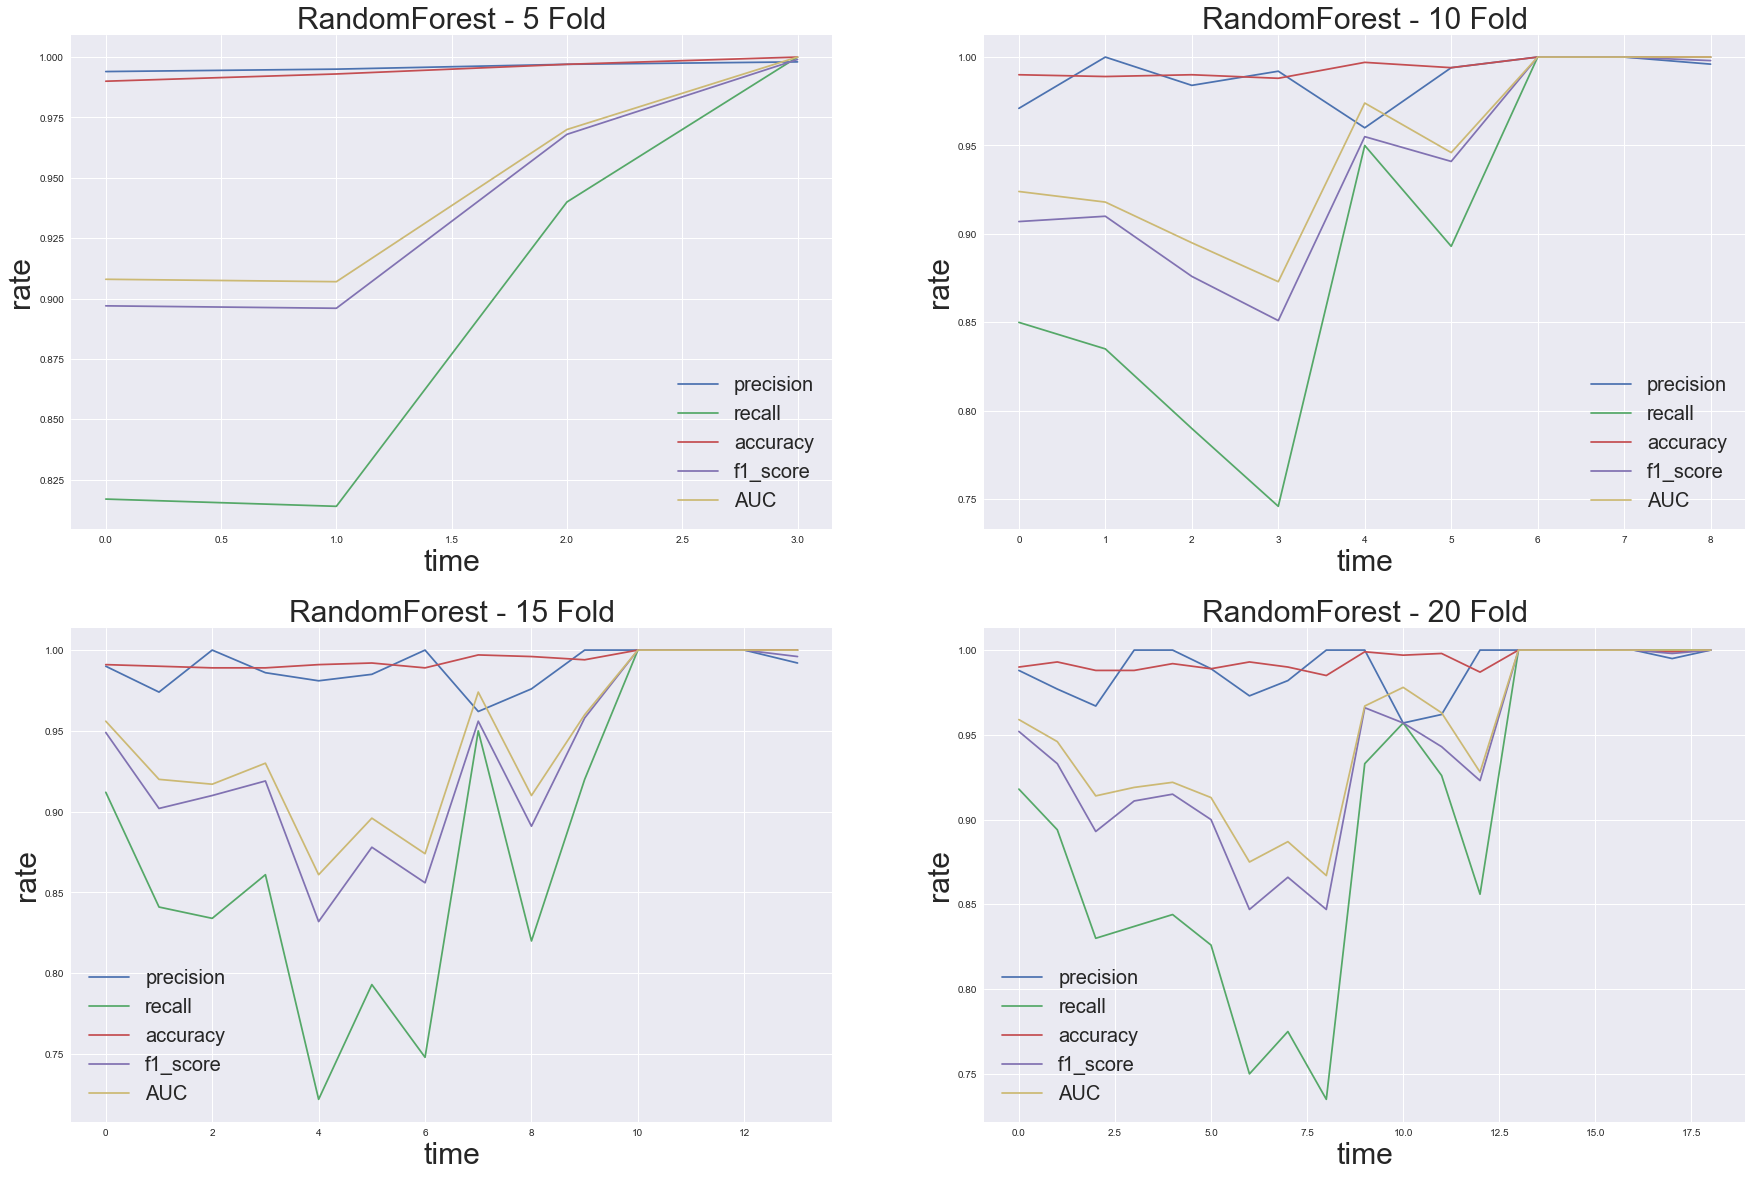

In [154]:
plotmodel(RFmodels,'RandomForest')

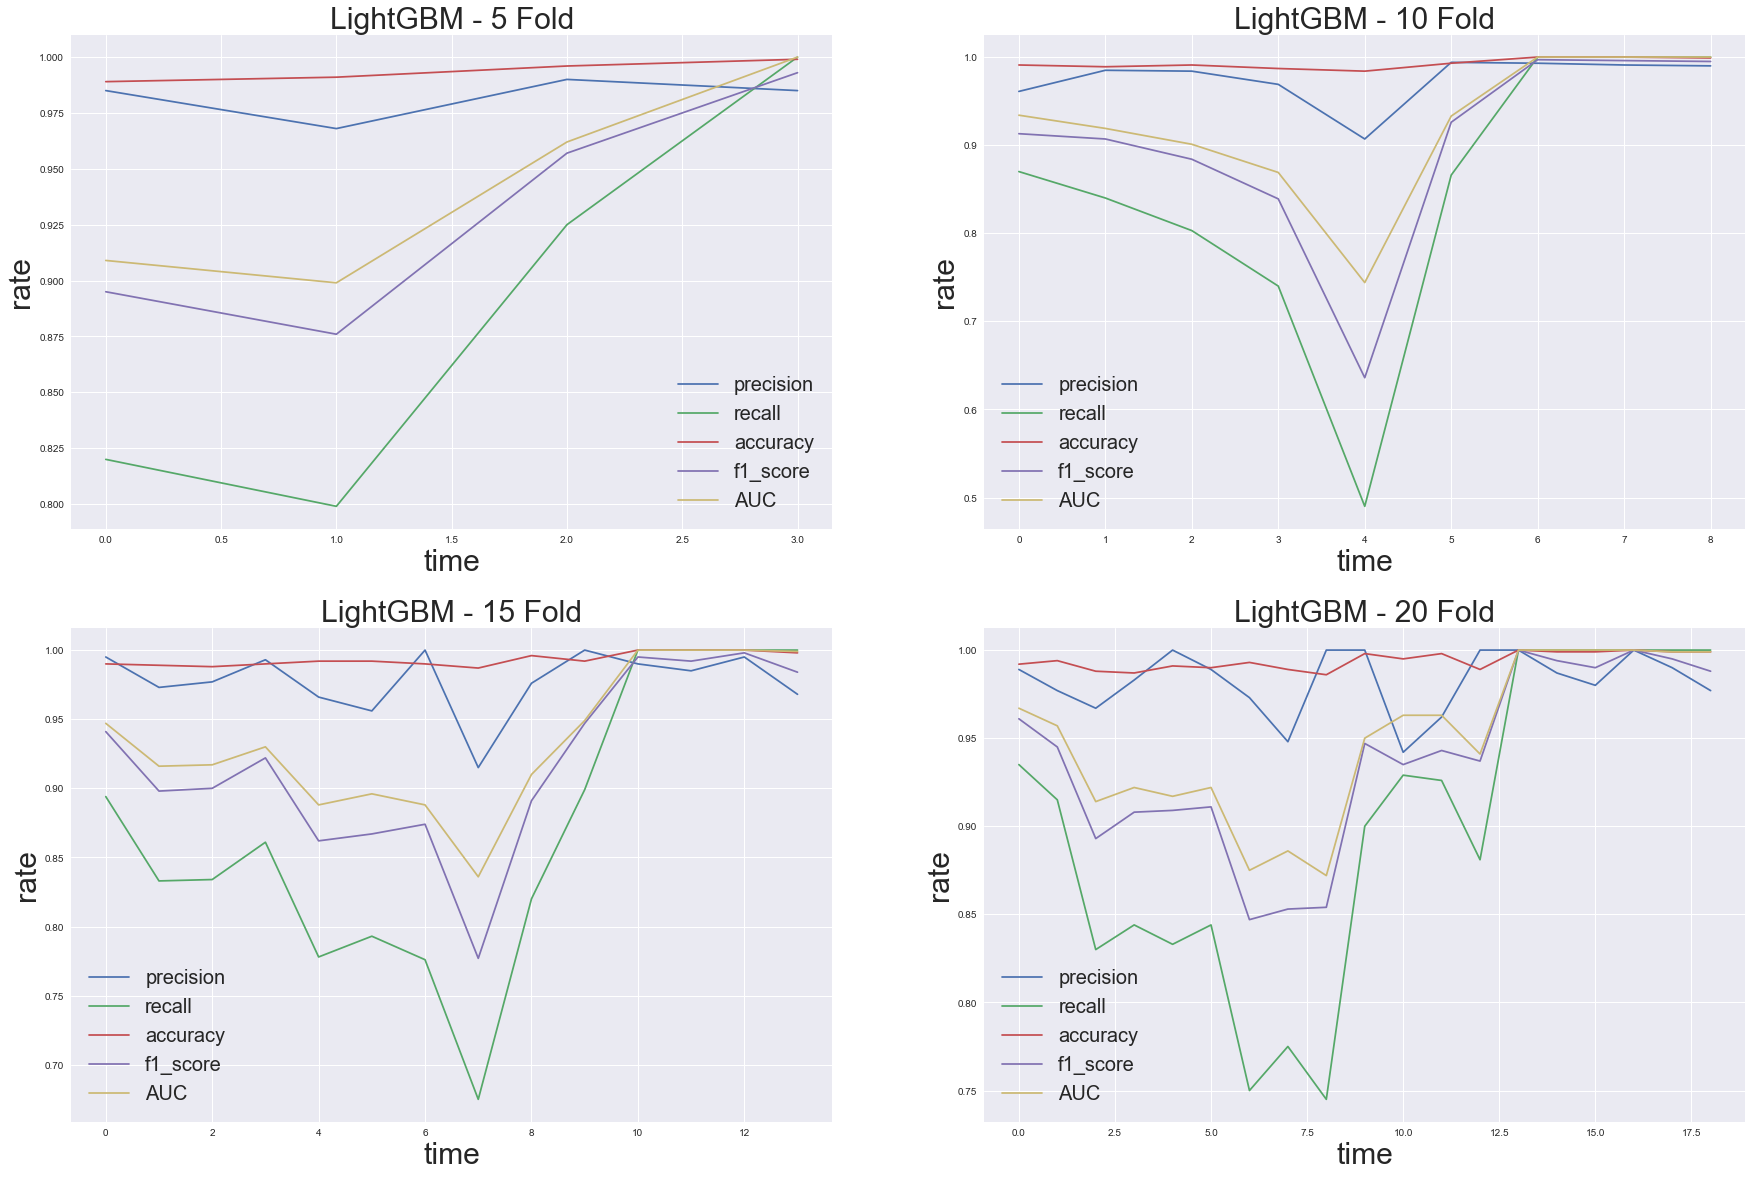

In [155]:
plotmodel(LGBMmodels,'LightGBM')

In [157]:
np.array(GeneralLGBM).transpose

[[0.979, 0.972, 0.998, 0.976, 0.986],
 [0.988, 0.974, 0.998, 0.981, 0.987],
 [0.984, 1.0, 0.999, 0.992, 1.0],
 [0.985, 1.0, 0.999, 0.993, 1.0],
 [0.983, 1.0, 0.999, 0.991, 0.999]]

In [163]:
np.array(GeneralLGBM).transpose()

array([[0.979, 0.988, 0.984, 0.985, 0.983],
       [0.972, 0.974, 1.   , 1.   , 1.   ],
       [0.998, 0.998, 0.999, 0.999, 0.999],
       [0.976, 0.981, 0.992, 0.993, 0.991],
       [0.986, 0.987, 1.   , 1.   , 0.999]])

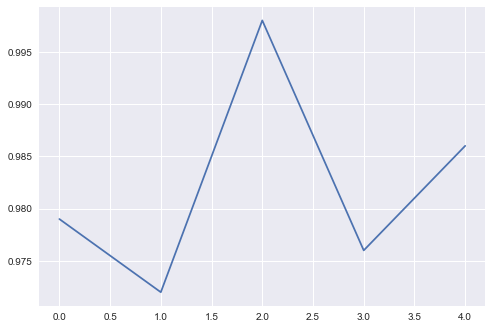

In [160]:
plt.plot(GeneralLGBM[0])

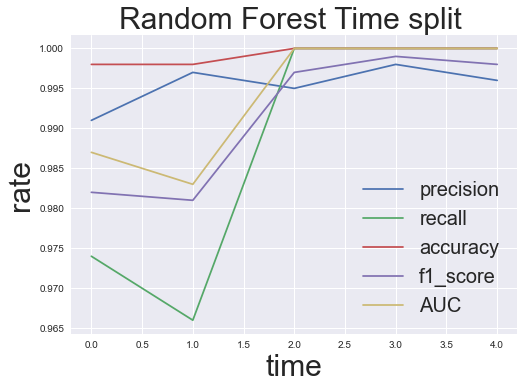

In [171]:
n = np.array(Generalsplit).transpose()
plt.title('Random Forest Time split ', fontsize=30)
plt.xlabel('time',fontsize=30)
plt.ylabel('rate',fontsize=30)
plt.plot(n[0],label='precision')
plt.plot(n[1],label='recall')
plt.plot(n[2],label='accuracy')
plt.plot(n[3],label='f1_score')
plt.plot(n[4],label='AUC')
plt.legend(fontsize=20)
plt.show()

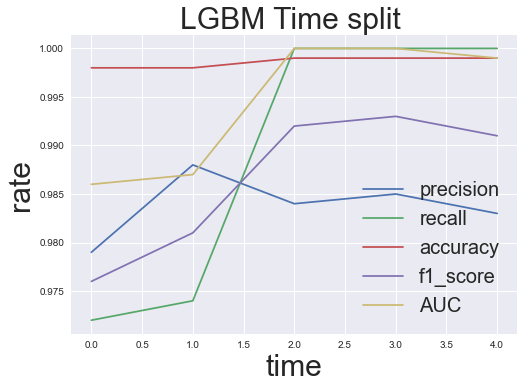

In [167]:
n = np.array(GeneralLGBM).transpose()
plt.title('LGBM Time split ', fontsize=30)
plt.xlabel('time',fontsize=30)
plt.ylabel('rate',fontsize=30)
plt.plot(n[0],label='precision')
plt.plot(n[1],label='recall')
plt.plot(n[2],label='accuracy')
plt.plot(n[3],label='f1_score')
plt.plot(n[4],label='AUC')
plt.legend(fontsize=20)
plt.show()